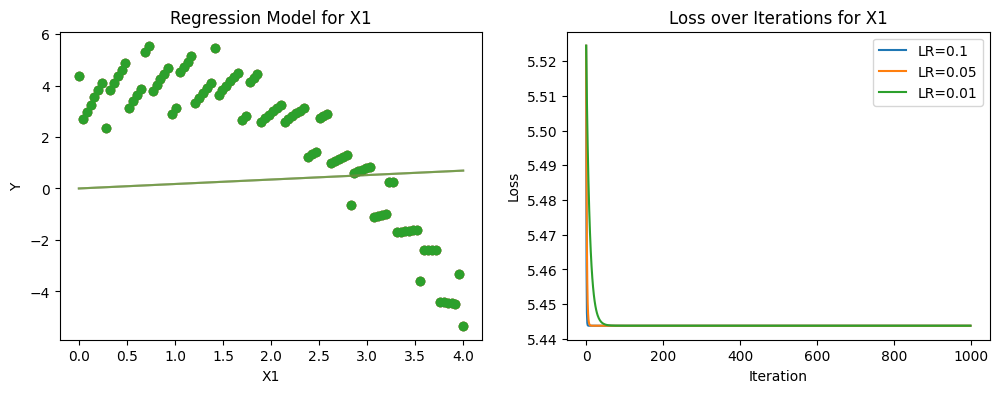

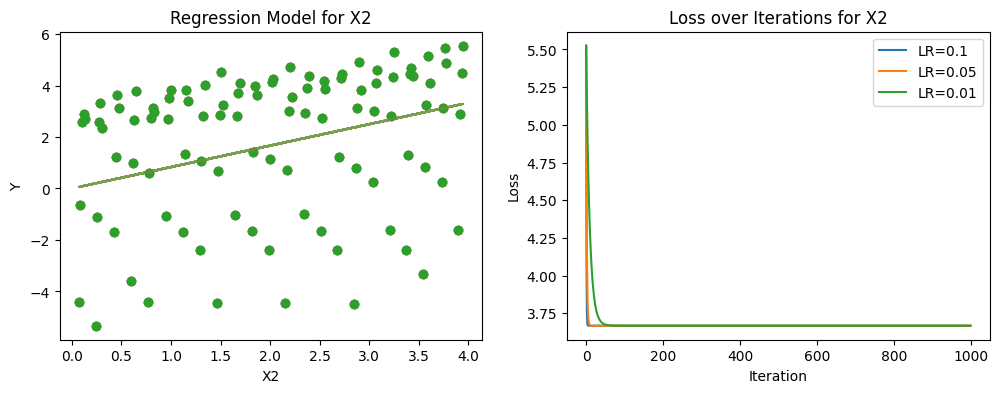

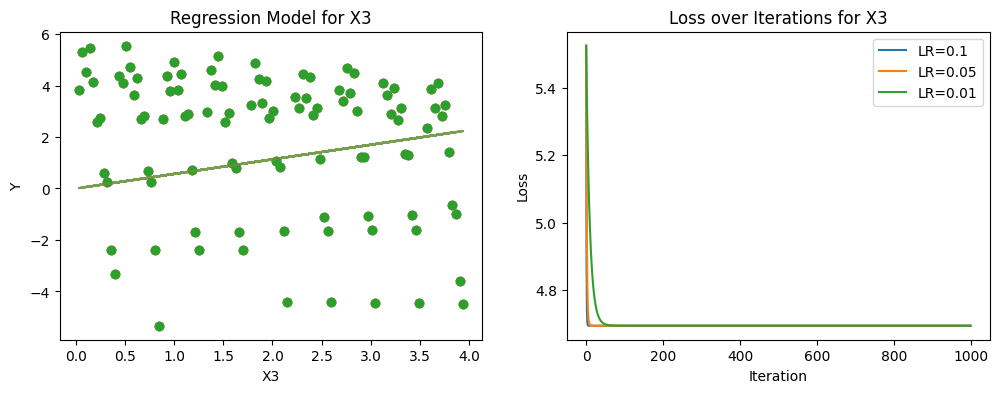

The explanatory variable with the lowest loss is X3.
The corresponding learning rate is 0.01.
Impact of different learning rates on final loss:
For X1, the lowest loss is 5.443785062397349 with LR=0.01.
For X2, the lowest loss is 3.6681076513143767 with LR=0.01.
For X3, the lowest loss is 4.695010653237691 with LR=0.01.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

file_path = '/content/drive/MyDrive/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

# Load the dataset
dataset = pd.read_csv(file_path)
X = dataset[['X1', 'X2', 'X3']].values
Y = dataset['Y'].values

# Define gradient descent function
def gradient_descent(X, Y, learning_rate, num_iterations):
    m = len(Y)
    n = X.shape[1]
    theta = np.zeros(n)  # Initialize parameters to zero
    loss_history = []

    for iteration in range(num_iterations):
        error = X.dot(theta) - Y
        gradient = np.zeros(n)
        for i in range(n):
            gradient[i] = np.sum(error * X[:, i])
        theta -= (learning_rate / m) * gradient
        loss = np.sum(error ** 2) / (2 * m)
        loss_history.append(loss)

    return theta, loss_history

# Initialize variables
learning_rates = [0.1, 0.05, 0.01]
num_iterations = 1000

# Initialize lists to store results
models = []
losses = []

# Loop through each explanatory variable
for i in range(3):
    X_i = X[:, i]
    X_i = X_i.reshape(-1, 1)

    plt.figure(figsize=(12, 4))

    current_models = []
    current_losses = []

    for learning_rate in learning_rates:
        theta, loss_history = gradient_descent(X_i, Y, learning_rate, num_iterations)
        current_models.append(theta)
        current_losses.append(loss_history[-1])

        # Plot the regression model
        plt.subplot(1, 2, 1)
        plt.scatter(X_i, Y, label=f'LR={learning_rate}')
        plt.plot(X_i, X_i.dot(theta), label=f'LR={learning_rate}', alpha=0.5)
        plt.xlabel(f'X{i+1}')
        plt.ylabel('Y')
        plt.title(f'Regression Model for X{i+1}')

        # Plot the loss over iterations
        plt.subplot(1, 2, 2)
        plt.plot(range(num_iterations), loss_history, label=f'LR={learning_rate}')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title(f'Loss over Iterations for X{i+1}')

    models.append(current_models)
    losses.append(current_losses)

    plt.legend()
    plt.show()

# Find the explanatory variable with the lowest loss
min_loss_idx = np.argmin(losses[0])  # Fix the index here
explanatory_variables = ['X1', 'X2', 'X3']
best_variable = explanatory_variables[i]
best_learning_rate = learning_rates[min_loss_idx]

print(f"The explanatory variable with the lowest loss is {best_variable}.")
print(f"The corresponding learning rate is {best_learning_rate}.")

# Describe the impact of different learning rates
print("Impact of different learning rates on final loss:")
for i in range(3):
    print(f"For X{i+1}, the lowest loss is {losses[i][min_loss_idx]} with LR={best_learning_rate}.")


